In [9]:
# Copyright 2019 Steven Mattis and Troy Butler

import numpy as np
import dynamical_systems as ds
from luq import *

# Uniformly sample the parameter samples to form a "prediction" or "test" set
num_samples = int(1e3)

params = np.random.uniform(size=(num_samples, 1))
ics = 0.25 * np.random.uniform(size=(num_samples, 2)) + 0.25

#ics = 2.0 * ics - 1.0
params = params - 0.5

# Construct the predicted time series data

num_time_preds = int(500)  # number of predictions (uniformly space) between [time_start,time_end]
time_start = 0.5
time_end = 40.0
times = np.linspace(time_start, time_end, num_time_preds)

phys = ds.Lienard()
predicted_time_series = phys.solve(ics=ics, params=params, t_eval=times)

In [10]:
num_obs = int(1e3)

true_a = 2
true_b = 2

params_obs = np.random.beta(size=(num_obs, 1), a=true_a, b=true_b)
ics_obs = 0.25 * np.random.beta(size=(num_obs, 2), a=true_a, b=true_b) + 0.25

#ics_obs = 2.0 * ics_obs - 1.0
params_obs = params_obs - 0.5

observed_time_series = phys.solve(ics=ics_obs, params=params_obs, t_eval=times)

# Add noise if desired
with_noise = False
noise_stdev = 0.05

if with_noise:
    observed_time_series += noise_stdev * np.random.randn(num_obs)

In [11]:
# Use LUQ to learn dynamics and QoIs
learn = LUQ(predicted_time_series, observed_time_series, times)

# time array indices over which to use
time_start_idx = 350
time_end_idx = 499

# Clean data
learn.clean_data(time_start_idx=time_start_idx, time_end_idx=time_end_idx,
                 num_clean_obs=50, tol=3.0e-2, min_knots=15, max_knots=40)
learn.dynamics(cluster_method='spectral', kwargs={'n_clusters': 2, 'n_init': 10})

0 16 0.015237129177116332
0 16 knots being used with error of 0.015237129177116332
1 16 0.01668357745549395
1 16 knots being used with error of 0.01668357745549395
2 16 0.015541223816155086
2 16 knots being used with error of 0.015541223816155086
3 16 0.01587281138546687
3 16 knots being used with error of 0.01587281138546687
4 16 0.01678503636105012
4 16 knots being used with error of 0.01678503636105012
5 16 0.021784565306844986
5 16 knots being used with error of 0.021784565306844986
6 16 0.015749535306495827
6 16 knots being used with error of 0.015749535306495827
7 16 0.015957013037421995
7 16 knots being used with error of 0.015957013037421995
8 16 0.015946305014162016
8 16 knots being used with error of 0.015946305014162016
9 16 0.02213387801147846
9 16 knots being used with error of 0.02213387801147846
10 16 0.015891035261396368
10 16 knots being used with error of 0.015891035261396368
11 16 0.01590300230913226
11 16 knots being used with error of 0.01590300230913226
12 16 0.01

100 16 0.015663136409544764
100 16 knots being used with error of 0.015663136409544764
101 16 0.015037763173031158
101 16 knots being used with error of 0.015037763173031158
102 16 0.015532175015501687
102 16 knots being used with error of 0.015532175015501687
103 16 0.016973117451596062
103 16 knots being used with error of 0.016973117451596062
104 16 0.015483680975135227
104 16 knots being used with error of 0.015483680975135227
105 16 0.015810568813264713
105 16 knots being used with error of 0.015810568813264713
106 16 0.015561266875553984
106 16 knots being used with error of 0.015561266875553984
107 16 0.016354367136718156
107 16 knots being used with error of 0.016354367136718156
108 16 0.015395538570392994
108 16 knots being used with error of 0.015395538570392994
109 16 0.016622792106737234
109 16 knots being used with error of 0.016622792106737234
110 16 0.015646495709772744
110 16 knots being used with error of 0.015646495709772744
111 16 0.019794299781576166
111 16 knots be

197 16 0.01645695932664125
197 16 knots being used with error of 0.01645695932664125
198 16 0.01585413702041055
198 16 knots being used with error of 0.01585413702041055
199 16 0.018385832151532094
199 16 knots being used with error of 0.018385832151532094
200 16 0.015423480533623041
200 16 knots being used with error of 0.015423480533623041
201 16 0.015732636363725464
201 16 knots being used with error of 0.015732636363725464
202 16 0.016694373440689556
202 16 knots being used with error of 0.016694373440689556
203 16 0.015934019332652153
203 16 knots being used with error of 0.015934019332652153
204 16 0.016240121319912555
204 16 knots being used with error of 0.016240121319912555
205 16 0.01610319396529358
205 16 knots being used with error of 0.01610319396529358
206 16 0.016749336645598523
206 16 knots being used with error of 0.016749336645598523
207 16 0.015990151064108154
207 16 knots being used with error of 0.015990151064108154
208 16 0.016102033062830225
208 16 knots being us

295 16 0.01622427707153404
295 16 knots being used with error of 0.01622427707153404
296 16 0.015997453523245955
296 16 knots being used with error of 0.015997453523245955
297 16 0.019120235790061828
297 16 knots being used with error of 0.019120235790061828
298 16 0.015606354876381288
298 16 knots being used with error of 0.015606354876381288
299 16 0.01650826442689551
299 16 knots being used with error of 0.01650826442689551
300 16 0.016401862214587525
300 16 knots being used with error of 0.016401862214587525
301 16 0.015461989330067621
301 16 knots being used with error of 0.015461989330067621
302 16 0.023004604066756387
302 16 knots being used with error of 0.023004604066756387
303 16 0.020177619822693487
303 16 knots being used with error of 0.020177619822693487
304 16 0.015577406786850555
304 16 knots being used with error of 0.015577406786850555
305 16 0.01641838150555649
305 16 knots being used with error of 0.01641838150555649
306 16 0.018971089004837436
306 16 knots being us

392 16 0.016443476419817877
392 16 knots being used with error of 0.016443476419817877
393 16 0.01900116237376799
393 16 knots being used with error of 0.01900116237376799
394 16 0.01524062217383501
394 16 knots being used with error of 0.01524062217383501
395 16 0.01552594123988317
395 16 knots being used with error of 0.01552594123988317
396 16 0.01580389329464254
396 16 knots being used with error of 0.01580389329464254
397 16 0.01663661248627417
397 16 knots being used with error of 0.01663661248627417
398 16 0.015458454291434989
398 16 knots being used with error of 0.015458454291434989
399 16 0.016353421470697765
399 16 knots being used with error of 0.016353421470697765
400 16 0.023094959367383292
400 16 knots being used with error of 0.023094959367383292
401 16 0.016771792281530046
401 16 knots being used with error of 0.016771792281530046
402 16 0.016261601278482116
402 16 knots being used with error of 0.016261601278482116
403 16 0.016618056913433633
403 16 knots being used w

490 16 0.015975964884989098
490 16 knots being used with error of 0.015975964884989098
491 16 0.015476492585552962
491 16 knots being used with error of 0.015476492585552962
492 16 0.01720644166745607
492 16 knots being used with error of 0.01720644166745607
493 16 0.016490953445062146
493 16 knots being used with error of 0.016490953445062146
494 16 0.016281877687581624
494 16 knots being used with error of 0.016281877687581624
495 16 0.015896617989684652
495 16 knots being used with error of 0.015896617989684652
496 16 0.015998118068916486
496 16 knots being used with error of 0.015998118068916486
497 16 0.016545586238350368
497 16 knots being used with error of 0.016545586238350368
498 16 0.016032104259730257
498 16 knots being used with error of 0.016032104259730257
499 16 0.015385372899638212
499 16 knots being used with error of 0.015385372899638212
500 16 0.0155365380654745
500 16 knots being used with error of 0.0155365380654745
501 16 0.01630560094650987
501 16 knots being use

587 16 0.016326425326983123
587 16 knots being used with error of 0.016326425326983123
588 16 0.016320576854512304
588 16 knots being used with error of 0.016320576854512304
589 16 0.016373324137796016
589 16 knots being used with error of 0.016373324137796016
590 16 0.016701254299236783
590 16 knots being used with error of 0.016701254299236783
591 16 0.01634180674664188
591 16 knots being used with error of 0.01634180674664188
592 16 0.016183634824324312
592 16 knots being used with error of 0.016183634824324312
593 16 0.015801643581032216
593 16 knots being used with error of 0.015801643581032216
594 16 0.01694541130471283
594 16 knots being used with error of 0.01694541130471283
595 16 0.01586772639127366
595 16 knots being used with error of 0.01586772639127366
596 16 0.016065417278322627
596 16 knots being used with error of 0.016065417278322627
597 16 0.01649608332083993
597 16 knots being used with error of 0.01649608332083993
598 16 0.01658990332835478
598 16 knots being used 

683 16 0.0157175792890306
683 16 knots being used with error of 0.0157175792890306
684 16 0.015643340631455418
684 16 knots being used with error of 0.015643340631455418
685 16 0.015667630628405756
685 16 knots being used with error of 0.015667630628405756
686 16 0.015051597624093966
686 16 knots being used with error of 0.015051597624093966
687 16 0.01855648763942607
687 16 knots being used with error of 0.01855648763942607
688 16 0.0165746083607005
688 16 knots being used with error of 0.0165746083607005
689 16 0.015055826878281334
689 16 knots being used with error of 0.015055826878281334
690 16 0.01603931507447107
690 16 knots being used with error of 0.01603931507447107
691 16 0.015215466445268541
691 16 knots being used with error of 0.015215466445268541
692 16 0.016862762924510857
692 16 knots being used with error of 0.016862762924510857
693 16 0.016166663391552465
693 16 knots being used with error of 0.016166663391552465
694 16 0.01517280646483283
694 16 knots being used with

780 16 0.01568522247038424
780 16 knots being used with error of 0.01568522247038424
781 16 0.015799684774726968
781 16 knots being used with error of 0.015799684774726968
782 16 0.016342900909895413
782 16 knots being used with error of 0.016342900909895413
783 16 0.015520451166765063
783 16 knots being used with error of 0.015520451166765063
784 16 0.01576555568347268
784 16 knots being used with error of 0.01576555568347268
785 16 0.01626132165858729
785 16 knots being used with error of 0.01626132165858729
786 16 0.01797030817892058
786 16 knots being used with error of 0.01797030817892058
787 16 0.015125426847154143
787 16 knots being used with error of 0.015125426847154143
788 16 0.017044861876998486
788 16 knots being used with error of 0.017044861876998486
789 16 0.01632948413737608
789 16 knots being used with error of 0.01632948413737608
790 16 0.015603852187478923
790 16 knots being used with error of 0.015603852187478923
791 16 0.016106751851028108
791 16 knots being used w

876 16 0.015750392061398912
876 16 knots being used with error of 0.015750392061398912
877 16 0.016684317257724592
877 16 knots being used with error of 0.016684317257724592
878 16 0.016226330727005328
878 16 knots being used with error of 0.016226330727005328
879 16 0.015807013487592576
879 16 knots being used with error of 0.015807013487592576
880 16 0.01667051623767541
880 16 knots being used with error of 0.01667051623767541
881 16 0.016264203541458657
881 16 knots being used with error of 0.016264203541458657
882 16 0.015961611695863655
882 16 knots being used with error of 0.015961611695863655
883 16 0.01633362490704638
883 16 knots being used with error of 0.01633362490704638
884 16 0.015981975115326844
884 16 knots being used with error of 0.015981975115326844
885 16 0.01961574174489424
885 16 knots being used with error of 0.01961574174489424
886 16 0.017225458796722836
886 16 knots being used with error of 0.017225458796722836
887 16 0.01572803225207179
887 16 knots being use

972 16 0.016480074005989755
972 16 knots being used with error of 0.016480074005989755
973 16 0.015437594244925712
973 16 knots being used with error of 0.015437594244925712
974 16 0.019142953167056706
974 16 knots being used with error of 0.019142953167056706
975 16 0.016116440212092634
975 16 knots being used with error of 0.016116440212092634
976 16 0.016249296018064196
976 16 knots being used with error of 0.016249296018064196
977 16 0.023281746490655526
977 16 knots being used with error of 0.023281746490655526
978 16 0.016276982021399645
978 16 knots being used with error of 0.016276982021399645
979 16 0.01699889524325479
979 16 knots being used with error of 0.01699889524325479
980 16 0.015567159787229796
980 16 knots being used with error of 0.015567159787229796
981 16 0.016785101873416274
981 16 knots being used with error of 0.016785101873416274
982 16 0.01574889159098621
982 16 knots being used with error of 0.01574889159098621
983 16 0.01541227506885024
983 16 knots being u

70 16 0.016328493839251494
70 16 knots being used with error of 0.016328493839251494
71 16 0.016015331972852865
71 16 knots being used with error of 0.016015331972852865
72 16 0.016270992257242618
72 16 knots being used with error of 0.016270992257242618
73 16 0.015915469270563646
73 16 knots being used with error of 0.015915469270563646
74 16 0.015940988829436595
74 16 knots being used with error of 0.015940988829436595
75 16 0.01571731911239238
75 16 knots being used with error of 0.01571731911239238
76 16 0.01571039922053491
76 16 knots being used with error of 0.01571039922053491
77 16 0.01650415130952139
77 16 knots being used with error of 0.01650415130952139
78 16 0.015647717108370682
78 16 knots being used with error of 0.015647717108370682
79 16 0.01686291542926315
79 16 knots being used with error of 0.01686291542926315
80 16 0.016921546173306944
80 16 knots being used with error of 0.016921546173306944
81 16 0.01646026114057543
81 16 knots being used with error of 0.01646026

168 16 0.015495946229741426
168 16 knots being used with error of 0.015495946229741426
169 16 0.015102193715891438
169 16 knots being used with error of 0.015102193715891438
170 16 0.015414766596688556
170 16 knots being used with error of 0.015414766596688556
171 16 0.016853263835628
171 16 knots being used with error of 0.016853263835628
172 16 0.016375026899756742
172 16 knots being used with error of 0.016375026899756742
173 16 0.01741322655678026
173 16 knots being used with error of 0.01741322655678026
174 16 0.016478591654052407
174 16 knots being used with error of 0.016478591654052407
175 16 0.015162420151609948
175 16 knots being used with error of 0.015162420151609948
176 16 0.015386601572126858
176 16 knots being used with error of 0.015386601572126858
177 16 0.0161085926493331
177 16 knots being used with error of 0.0161085926493331
178 16 0.015568466677973014
178 16 knots being used with error of 0.015568466677973014
179 16 0.015535794573085475
179 16 knots being used wit

265 16 0.015815438847772076
265 16 knots being used with error of 0.015815438847772076
266 16 0.015337601397997318
266 16 knots being used with error of 0.015337601397997318
267 16 0.016724363039777857
267 16 knots being used with error of 0.016724363039777857
268 16 0.016296593632360697
268 16 knots being used with error of 0.016296593632360697
269 16 0.01757164645832669
269 16 knots being used with error of 0.01757164645832669
270 16 0.01649146629147896
270 16 knots being used with error of 0.01649146629147896
271 16 0.015450851403488676
271 16 knots being used with error of 0.015450851403488676
272 16 0.016377337012938094
272 16 knots being used with error of 0.016377337012938094
273 16 0.015247616036413903
273 16 knots being used with error of 0.015247616036413903
274 16 0.016083154066330967
274 16 knots being used with error of 0.016083154066330967
275 16 0.016135231848754664
275 16 knots being used with error of 0.016135231848754664
276 16 0.016655719045054054
276 16 knots being 

363 16 0.015544223128009469
363 16 knots being used with error of 0.015544223128009469
364 16 0.016009712645017007
364 16 knots being used with error of 0.016009712645017007
365 16 0.016253981068097147
365 16 knots being used with error of 0.016253981068097147
366 16 0.020218244422088028
366 16 knots being used with error of 0.020218244422088028
367 16 0.020416963392036264
367 16 knots being used with error of 0.020416963392036264
368 16 0.016831891159116
368 16 knots being used with error of 0.016831891159116
369 16 0.015679840033226814
369 16 knots being used with error of 0.015679840033226814
370 16 0.01683175876775378
370 16 knots being used with error of 0.01683175876775378
371 16 0.016022348783963348
371 16 knots being used with error of 0.016022348783963348
372 16 0.015839018649250015
372 16 knots being used with error of 0.015839018649250015
373 16 0.01640992949833306
373 16 knots being used with error of 0.01640992949833306
374 16 0.017237003971210682
374 16 knots being used w

459 16 0.016455056600074538
459 16 knots being used with error of 0.016455056600074538
460 16 0.022706790488941114
460 16 knots being used with error of 0.022706790488941114
461 16 0.01664776556057733
461 16 knots being used with error of 0.01664776556057733
462 16 0.01577138440103
462 16 knots being used with error of 0.01577138440103
463 16 0.015927355294500834
463 16 knots being used with error of 0.015927355294500834
464 16 0.016287475250510327
464 16 knots being used with error of 0.016287475250510327
465 16 0.015347676035268697
465 16 knots being used with error of 0.015347676035268697
466 16 0.016398361426165065
466 16 knots being used with error of 0.016398361426165065
467 16 0.016798332477822316
467 16 knots being used with error of 0.016798332477822316
468 16 0.015295175135640984
468 16 knots being used with error of 0.015295175135640984
469 16 0.015517089543295634
469 16 knots being used with error of 0.015517089543295634
470 16 0.015278225827613307
470 16 knots being used w

556 16 0.01644735807185804
556 16 knots being used with error of 0.01644735807185804
557 16 0.015544396151587947
557 16 knots being used with error of 0.015544396151587947
558 16 0.01567010193852006
558 16 knots being used with error of 0.01567010193852006
559 16 0.015334042097007361
559 16 knots being used with error of 0.015334042097007361
560 16 0.016870692155316346
560 16 knots being used with error of 0.016870692155316346
561 16 0.015269444742591367
561 16 knots being used with error of 0.015269444742591367
562 16 0.0161763082525656
562 16 knots being used with error of 0.0161763082525656
563 16 0.016378958552760368
563 16 knots being used with error of 0.016378958552760368
564 16 0.015934013717952274
564 16 knots being used with error of 0.015934013717952274
565 16 0.015342693839446706
565 16 knots being used with error of 0.015342693839446706
566 16 0.016712906872985947
566 16 knots being used with error of 0.016712906872985947
567 16 0.016429467432967925
567 16 knots being used

653 16 0.01563581724073196
653 16 knots being used with error of 0.01563581724073196
654 16 0.016523587686592987
654 16 knots being used with error of 0.016523587686592987
655 16 0.015696492185461434
655 16 knots being used with error of 0.015696492185461434
656 16 0.017032080354081894
656 16 knots being used with error of 0.017032080354081894
657 16 0.01746000427816008
657 16 knots being used with error of 0.01746000427816008
658 16 0.01639147678354099
658 16 knots being used with error of 0.01639147678354099
659 16 0.016148993047558787
659 16 knots being used with error of 0.016148993047558787
660 16 0.022154014335615767
660 16 knots being used with error of 0.022154014335615767
661 16 0.016842375536772328
661 16 knots being used with error of 0.016842375536772328
662 16 0.016346194322205986
662 16 knots being used with error of 0.016346194322205986
663 16 0.0156999936885244
663 16 knots being used with error of 0.0156999936885244
664 16 0.016667165259242486
664 16 knots being used w

751 16 0.01640673565593923
751 16 knots being used with error of 0.01640673565593923
752 16 0.0176157754676025
752 16 knots being used with error of 0.0176157754676025
753 16 0.016607570724318937
753 16 knots being used with error of 0.016607570724318937
754 16 0.016352718537230033
754 16 knots being used with error of 0.016352718537230033
755 16 0.01564930438587808
755 16 knots being used with error of 0.01564930438587808
756 16 0.01634710964909756
756 16 knots being used with error of 0.01634710964909756
757 16 0.016767025155754928
757 16 knots being used with error of 0.016767025155754928
758 16 0.015403720550557073
758 16 knots being used with error of 0.015403720550557073
759 16 0.015988393463915146
759 16 knots being used with error of 0.015988393463915146
760 16 0.01614619434987545
760 16 knots being used with error of 0.01614619434987545
761 16 0.015329646090917737
761 16 knots being used with error of 0.015329646090917737
762 16 0.015537773394226023
762 16 knots being used wit

847 16 0.01576148164654798
847 16 knots being used with error of 0.01576148164654798
848 16 0.015877613533514905
848 16 knots being used with error of 0.015877613533514905
849 16 0.015473769410445603
849 16 knots being used with error of 0.015473769410445603
850 16 0.016749212491461288
850 16 knots being used with error of 0.016749212491461288
851 16 0.0165522714267438
851 16 knots being used with error of 0.0165522714267438
852 16 0.021800404924986198
852 16 knots being used with error of 0.021800404924986198
853 16 0.01641283629511362
853 16 knots being used with error of 0.01641283629511362
854 16 0.016580650911480234
854 16 knots being used with error of 0.016580650911480234
855 16 0.01563415725163368
855 16 knots being used with error of 0.01563415725163368
856 16 0.016079783128818484
856 16 knots being used with error of 0.016079783128818484
857 16 0.02180750218805317
857 16 knots being used with error of 0.02180750218805317
858 16 0.015205086188567906
858 16 knots being used wit

943 16 0.01673750937073236
943 16 knots being used with error of 0.01673750937073236
944 16 0.015061556687905682
944 16 knots being used with error of 0.015061556687905682
945 16 0.015091634714442421
945 16 knots being used with error of 0.015091634714442421
946 16 0.015859979279609675
946 16 knots being used with error of 0.015859979279609675
947 16 0.01684839206156558
947 16 knots being used with error of 0.01684839206156558
948 16 0.016006319985904863
948 16 knots being used with error of 0.016006319985904863
949 16 0.015283775584925725
949 16 knots being used with error of 0.015283775584925725
950 16 0.016087036254883193
950 16 knots being used with error of 0.016087036254883193
951 16 0.016175330959595963
951 16 knots being used with error of 0.016175330959595963
952 16 0.01693051211084632
952 16 knots being used with error of 0.01693051211084632
953 16 0.015648284328319308
953 16 knots being used with error of 0.015648284328319308
954 16 0.016661136917001787
954 16 knots being us

1.0 positive nu ratio for cluster 0
0.16666666666666666 positive nu ratio for cluster 1


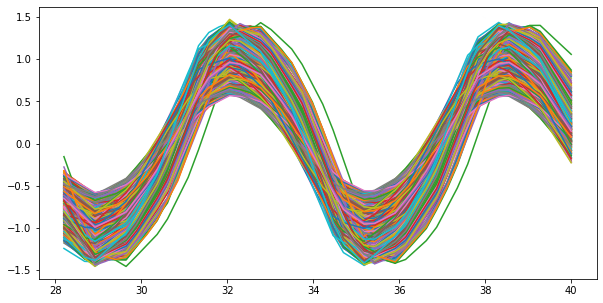

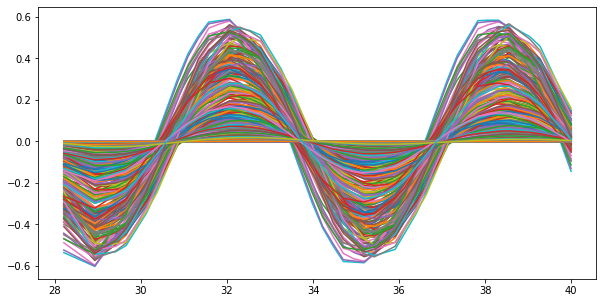

In [18]:
import matplotlib.pyplot as plt

for j in range(learn.num_clusters):
    plt.figure(figsize=(10,5))
    pos = 0
    neg = 0
    for i in range(num_samples):
        if learn.predict_labels[i] == j:
            if params[i] < 0.0:
                neg += 1
            else:
                pos += 1
            plt.plot(learn.clean_times, learn.clean_predictions[i, :])
    print(pos/(pos+neg), 'positive nu ratio for cluster', j)


In [15]:
predict_map, obs_map = learn.learn_qois_and_transform(num_qoi=3)

2 principal components explain 99.6327% of variance for cluster 0 with {'kernel': 'linear'}
11 principal components explain 95.9001% of variance for cluster 0 with {'kernel': 'rbf'}
4 principal components explain 95.9639% of variance for cluster 0 with {'kernel': 'sigmoid'}
6 principal components explain 96.8195% of variance for cluster 0 with {'kernel': 'poly'}
2 principal components explain 98.7704% of variance for cluster 0 with {'kernel': 'cosine'}
Best kPCA for cluster  0  is  {'kernel': 'linear'}
3 principal components explain 99.7345% of variance.
2 principal components explain 99.8769% of variance for cluster 1 with {'kernel': 'linear'}
9 principal components explain 95.1082% of variance for cluster 1 with {'kernel': 'rbf'}
2 principal components explain 96.9349% of variance for cluster 1 with {'kernel': 'sigmoid'}
3 principal components explain 97.3899% of variance for cluster 1 with {'kernel': 'poly'}
2 principal components explain 98.6682% of variance for cluster 1 with {'ke

In [16]:
learn.generate_kdes()
learn.compute_r()

r values: [1.058802133386758, 1.0691962687356735]


[1.058802133386758, 1.0691962687356735]